In [5]:
import pandas as pd

data = pd.read_csv("Steel_industry_data.csv")
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


### Data Cleansing

Dapat diperhatikan bahwa pada atribut CO2(tCO2), persentase kekosongan data pada atribut CO2(tCO2) adalah 100%. Maka dari itu, perlu dilakukan pembersihan data untuk mengatasi kekotoran data tersebut. 

Mengapa perlu dilakukan pembersihan data terkhusus pada atribut CO2(tCO2)? Karena pada data Steel_industry yang kami gunakan, atribut CO2(tCO2) tidak memiliki pengaruh pada atribut lain, pembersihan data ini dilakukan supaya hanya tersisa data data yang signifikan.

Karena data memiliki kekosongan sebesar 100% pada atribut CO2(tCO2), maka dapat dilakukan pembersihan data dengan menghapus kolom atau atribut CO2(tCO2). Hal tersebut dapat dilakukan dengan fungsi *drop()*

In [6]:
data.drop("CO2(tCO2)", inplace=True, axis=1)
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,77.72,99.96,85500,Weekday,Monday,Light_Load


### Korelasi

1. Heatmap yang menunjukkan korelasi antaratribut

In [7]:
#corr = data.corr()
#corr

##### 2. Korelasi antara atribut Usage_kWh (konsumsi energi industri) dengan atribut lainnya

Nilai koefisien korelasi antara atribut Usage_kWh dengan atribut Lagging_Current_Reactive.Power_kVarh (0.896150) mendekati 1. Hal ini menunjukkan bahwa perubahan besar konsumsi energi industri sejalan dengan perubahan besar daya terdahulu yang disuplai oleh komponen reaktif dan perubahan besar emisi gas karbon dioksida.

Di lain sisi, nilai koefisien korelasi antara atribut Usage_kWh dengan atribut Leading_Current_Reactive_Power_kVarh (-0.324922), Lagging_Current_Power_Factor (0.385960), Leading_Current_Power_Factor (0.353566), dan NSM (0.234610) mendekati 0. Hal ini menunjukkan bahwa besar konsumsi energi industri tidak signifikan terhadap besar fasor daya terdahulu yang disuplai oleh komponen reaktif, fasor daya terbelakang yang disuplai oleh komponen reaktif, dan jumlah detik dari tengah malam.

##### 3. Korelasi antara atribut Lagging_Current_Reactive.Power_kVarh (daya terbelakang yang disuplai oleh komponen reaktif) dengan atribut lainnya

Nilai koefisien korelasi antara atribut Lagging_Current_Reactive.Power_kVarh dengan atribut Leading_Current_Reactive_Power_kVarh (-0.405142), Lagging_Current_Power_Factor (0.144534), Leading_Current_Power_Factor (0.407716), dan NSM (0.082662) mendekati 0. Hal ini menunjukkan bahwa besar daya terbelakang yang disuplai oleh komponen reaktif tidak signifikan terhadap besar daya terdahulu yang disuplai oleh komponen reaktif, fasor daya terbelakang yang disuplai oleh komponen reaktif, fasor daya terdahulu yang disuplai oleh komponen reaktif, dan jumlah detik dari tengah malam.

##### 4. Korelasi antara atribut Leading_Current_Reactive_Power_kVarh (daya terdahulu yang disuplai oleh komponen reaktif) dengan atribut lainnya

Nilai koefisien korelasi antara atribut Leading_Current_Reactive_Power_kVarh dengan atribut Lagging_Current_Power_Factor (0.526770) mendekati 1. Hal ini menunjukkan bahwa perubahan besar daya terdahulu yang disuplai oleh komponen reaktif sejalan dengan perubahan besar fasor daya terbelakang yang disuplai oleh komponen reaktif.

Di lain sisi, nilai koefisien korelasi antara atribut Leading_Current_Reactive_Power_kVarh dengan atribut NSM (0.371605) mendekati 0. Hal ini menunjukkan bahwa besar daya terdahulu yang disuplai oleh komponen reaktif tidak signifikan terhadap besar emisi gas karbon dioksida, besar fasor daya terdahulu yang disuplai oleh komponen reaktif, dan jumlah detik dari tengah malam.

Terakhir, nilai koefisien korelasi antara atribut Leading_Current_Reactive_Power_kVarh dengan atribut Leading_Current_Reactive_Power_Factor (-0.944039) mendekati -1. Hal ini menunjukkan bahwa perubahan besar daya terdahulu yang disuplai oleh komponen reaktif berbanding terbalik dengan perubahan besar fasor daya terdahulu yang disuplai oleh komponen reaktif.

##### 5. Korelasi antara atribut Lagging_Current_Power_Factor (fasor daya terbelakang yang disuplai oleh komponen reaktif) dengan atribut lainnya

Nilai koefisien korelasi antara atribut Lagging_Current_Power_Factor dengan atribut NSM (0.565270) mendekati 1. Hal ini menunjukkan bahwa perubahan besar fasor daya terbelakang yang disuplai oleh komponen reaktif sejalan dengan perubahan jumlah detik dari tengah malam.

Sedangkan, nilai koefisien korelasi antara atribut Lagging_Current_Power_Factor dengan atribut Leading_Current_Power_Factor (-0.519967) mendekati -1. Hal ini menunjukkan bahwa perubahan besar fasor daya terbelakang yang disuplai oleh komponen reaktif berbanding terbalik dengan perubahan besar fasor daya terdahulu yang disuplai oleh komponen reaktif.

##### 6. Korelasi antara atribut Leading_Current_Power_Factor (fasor daya terdahulu yang disuplai oleh komponen reaktif) dengan atribut lainnya

Nilai koefisien korelasi antara atribut Leading_Current_Power_Factor dengan atribut NSM (-0.360563) mendekati 0. Hal ini menunjukkan bahwa perubahan besar fasor daya terdahulu yang disuplai oleh komponen reaktif tidak signifikan terhadap perubahan jumlah detik dari tengah malam.

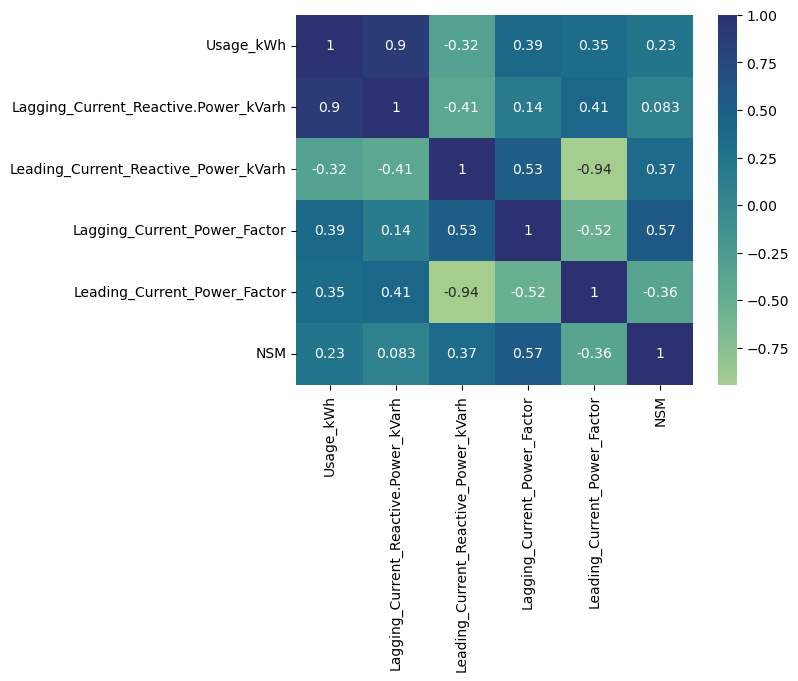

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(data.corr(numeric_only=True), annot=True, cmap="crest")
plt.show()